## 1️.Objective of the Analysis

The objective of this Exploratory Data Analysis (EDA) is to:

- Understand the overall structure and quality of the housing dataset.
- Identify key features influencing property price and investment value.
- Examine distributions and relationships of important variables like:
  - Price, Size, BHK, Location, Furnishing, Amenities
- Detect any issues such as missing values, duplicates, or unrealistic data.
- Generate insights that will support:

  ✔ Feature engineering  
  ✔ Target creation (`Good_Investment`, `Future_Price_5Y`)  
  ✔ Building classification and regression ML models

This section ensures that the dataset is well-understood before modeling.



## 2️. Importing Required Libraries

In [3]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Allow notebook to import from src/
import sys, os
sys.path.append(os.path.abspath(".."))

from src.data.load import load_raw_data  

# Display options
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

# Plot style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print("✔ Libraries imported successfully")


✔ Libraries imported successfully


## 3️. Loading the Dataset

In [4]:
DATA_PATH = "../data/raw/india_housing_prices.csv"

try:
    df = load_raw_data(DATA_PATH)
    display(df.head())
    print(f"✔ Data loaded successfully — {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print("❌ ERROR: Dataset not found. Check file path.")

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,Furnished,22,1,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,Unfurnished,21,20,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,Semi-furnished,19,27,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,Furnished,21,26,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,Semi-furnished,3,2,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


✔ Data loaded successfully — 250000 rows, 23 columns


## 4️. Basic Data Overview

In [5]:
print("Shape (rows, columns):", df.shape)

print("\nColumn names:")
print(df.columns.tolist())

print("\nInfo:")
df.info()

print("\nNumeric summary:")
df.describe()

Shape (rows, columns): (250000, 23)

Column names:
['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,"250,000.00","250,000.00","250,000.00","250,000.00","250,000.00","250,000.00","250,000.00","250,000.00","250,000.00","250,000.00","250,000.00"
mean,"125,000.50",3.00,"2,749.81",254.59,0.13,"2,006.52",14.97,15.50,18.48,5.50,5.50
std,"72,168.93",1.42,"1,300.61",141.35,0.13,9.81,8.95,8.67,9.81,2.88,2.87
min,1.00,1.00,500.00,10.00,0.00,"1,990.00",0.00,1.00,2.00,1.00,1.00
25%,"62,500.75",2.00,"1,623.00",132.55,0.05,"1,998.00",7.00,8.00,10.00,3.00,3.00
50%,"125,000.50",3.00,"2,747.00",253.87,0.09,"2,007.00",15.00,15.00,18.00,5.00,5.00
75%,"187,500.25",4.00,"3,874.00",376.88,0.16,"2,015.00",23.00,23.00,27.00,8.00,8.00
max,"250,000.00",5.00,"5,000.00",500.00,0.99,"2,023.00",30.00,30.00,35.00,10.00,10.00


### Initial Observations

- Dataset shape: `250000` rows and `23` columns.
- Key numerical columns: `Price_in_Lakhs`, `Size_in_SqFt`, `Price_per_SqFt`, `BHK`, `Year_Built`, `Age_of_Property`, `Nearby_Schools`, `Nearby_Hospitals`, `Public_Transport_Accessibility`, `Parking_Space`, `Security`, etc.
- Key categorical columns: `State`, `City`, `Locality`, `Property_Type`, `Furnished_Status`, `Facing`, `Owner_Type`, `Availability_Status`, `Amenities`.
- Data types appear correct: numeric features are stored as `int64/float64` and categorical features as `object`. No obvious type issues at this stage.



## 5️. Data Quality Check

In [6]:
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_counts / len(df) * 100).round(2)

missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_percent": missing_percent
})

if missing_summary["missing_count"].sum() == 0:
    print("✔ No missing values found in the dataset.")
else:
    display(missing_summary[missing_summary["missing_count"] > 0])

✔ No missing values found in the dataset.


In [7]:
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


## 📌 Data Quality Summary

- Dataset contains **250,000 rows** and **23 columns**.
- **Missing Values:**
  - ✔ There are **0 missing values** in all columns (0% missing rate).
  - ➤ No imputation required for this dataset.
- **Duplicate Rows:**
  - ✔ Duplicate rows found: **0**
  - ➤ Dataset appears already deduplicated.
- **Data Types:**
  - ✔ Numeric features such as `Price_in_Lakhs`, `Size_in_SqFt`, `BHK`, etc. are correctly represented as `int64/float64`.
  - ✔ Categorical features such as `City`, `Locality`, `Property_Type`, etc. are correctly represented as `object`.
- **Conclusion:**
  - Overall data quality is **excellent**.
  - No major data cleaning is required.
  - We can move directly to **exploratory visual analysis** and **feature engineering**.


## 6. Univariate Analysis – Numerical Features

In this section we analyse the distributions of key numerical variables:

- `Price_in_Lakhs`
- `Size_in_SqFt`
- `Price_per_SqFt`
- `BHK`

This helps us understand typical ranges, skewness, and potential outliers.


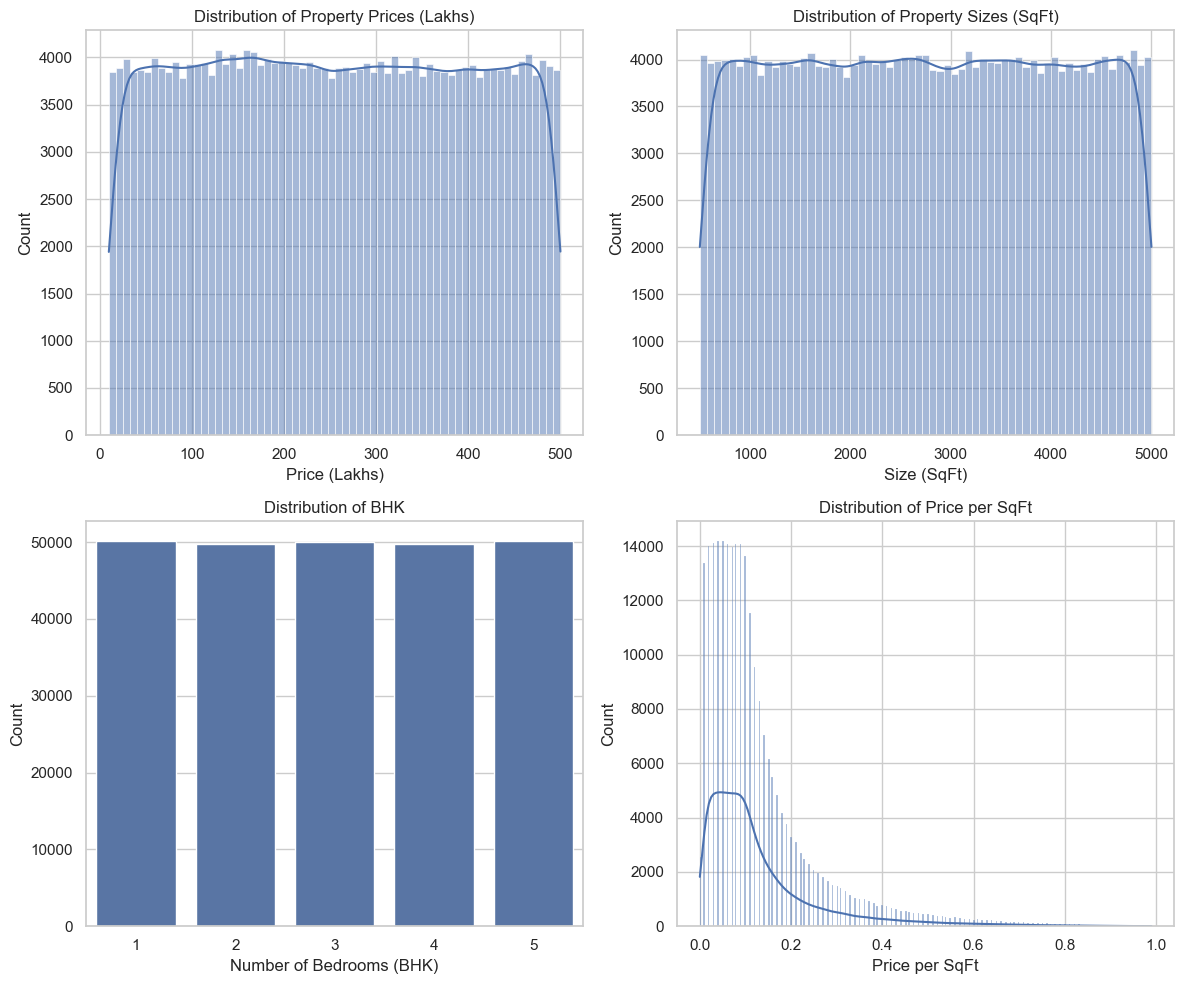

In [8]:
# Distributions of main numerical features

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Price distribution
sns.histplot(df["Price_in_Lakhs"], kde=True, ax=axs[0, 0])
axs[0, 0].set_title("Distribution of Property Prices (Lakhs)")
axs[0, 0].set_xlabel("Price (Lakhs)")
axs[0, 0].set_ylabel("Count")

# Size distribution
sns.histplot(df["Size_in_SqFt"], kde=True, ax=axs[0, 1])
axs[0, 1].set_title("Distribution of Property Sizes (SqFt)")
axs[0, 1].set_xlabel("Size (SqFt)")
axs[0, 1].set_ylabel("Count")

# BHK distribution
sns.countplot(x="BHK", data=df, ax=axs[1, 0])
axs[1, 0].set_title("Distribution of BHK")
axs[1, 0].set_xlabel("Number of Bedrooms (BHK)")
axs[1, 0].set_ylabel("Count")

# Price per SqFt distribution
sns.histplot(df["Price_per_SqFt"], kde=True, ax=axs[1, 1])
axs[1, 1].set_title("Distribution of Price per SqFt")
axs[1, 1].set_xlabel("Price per SqFt")
axs[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()


### 6. Univariate Analysis – Numerical Features: Observations

- **Price (`Price_in_Lakhs`)**
  - The distribution appears **uniformly spread** between ~0 to ~500 Lakhs.
  - This is **not typical of real-world housing data**, suggesting the dataset is synthetic or generated.

- **Size (`Size_in_SqFt`)**
  - Property sizes also show a **uniform distribution** between ~500 and ~5000 SqFt.
  - Again, this confirms the dataset may be synthetically balanced.

- **BHK (Bedrooms)**
  - The count of **1 to 5 BHK properties is almost identical** (~50,000 each).
  - Real-world datasets usually have more 2–3 BHK listings than 4–5 BHK.

- **Price per SqFt**
  - Shows a **right-skewed distribution**, meaning:
    - Many properties are priced low per SqFt
    - A small number command premium pricing

- **Conclusion**
  - The data is likely **synthetically generated** and artificially balanced across key numerical features.
  - This helps models learn better but does not reflect true real-estate market distributions.


## 7️. Univariate Analysis – Categorical Features

We analyze the distribution of important categorical variables to understand the diversity and representation of different property attributes.


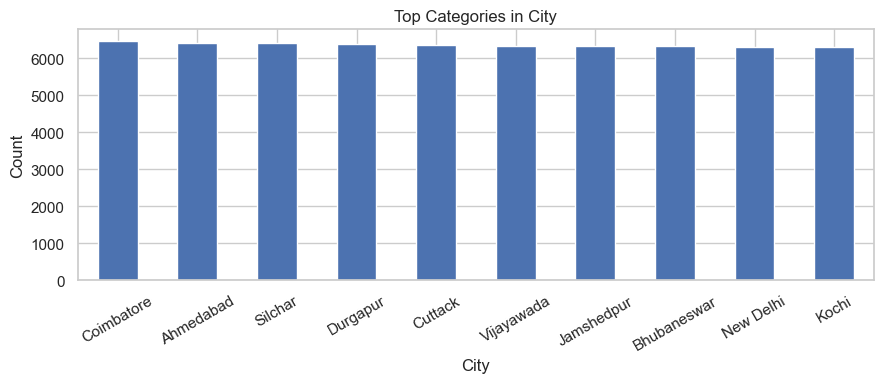

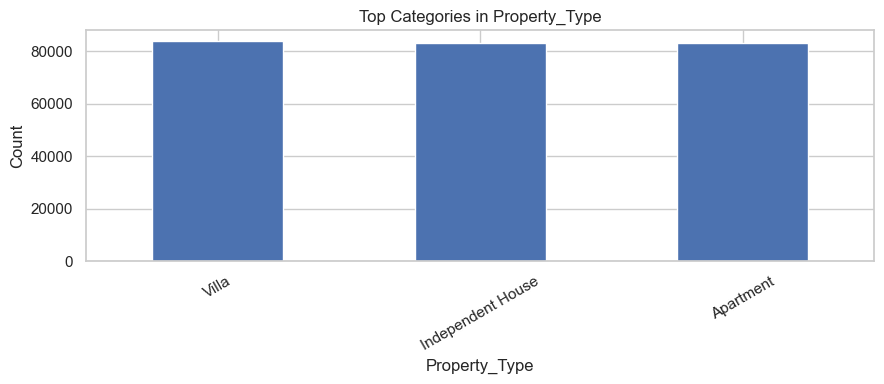

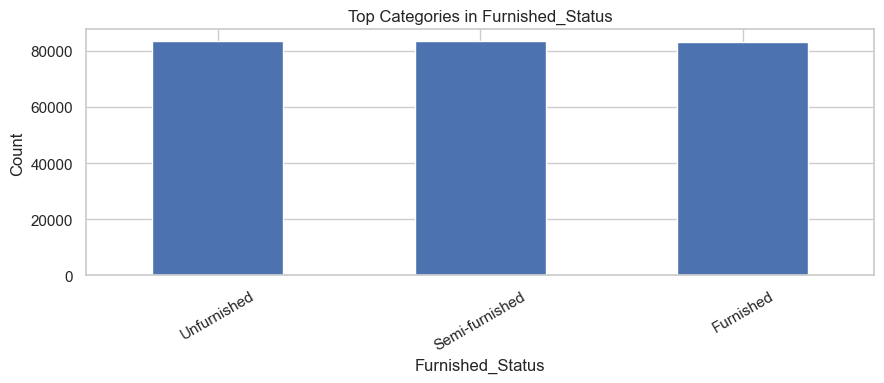

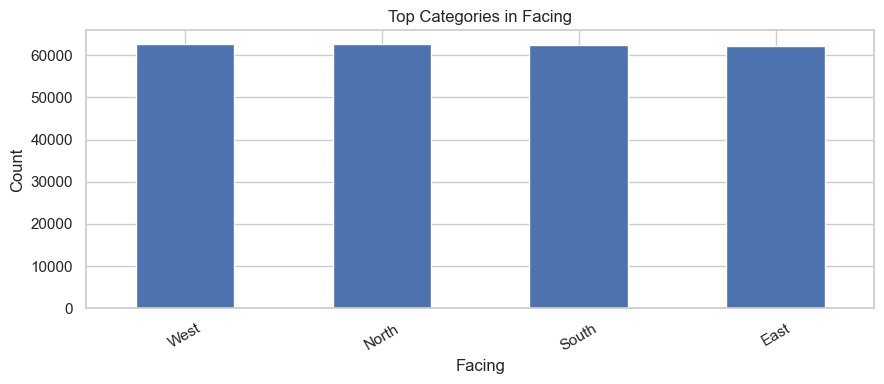

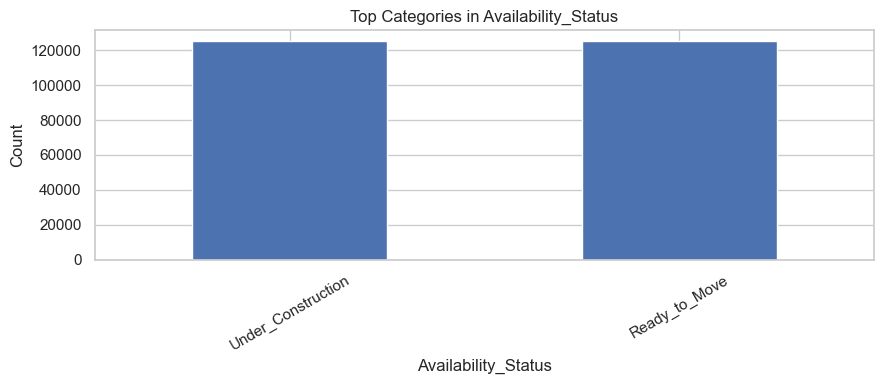

In [9]:
categorical_cols = ["City", "Property_Type", "Furnished_Status", "Facing", "Availability_Status"]

for col in categorical_cols:
    plt.figure(figsize=(9,4))
    df[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

### 7️. Univariate Analysis – Categorical Features: Observations

- **City**
  - Cities like Coimbatore, Ahmedabad, Silchar, Durgapur, Cuttack, Vijayawada, Jamshedpur, Bhubaneswar, New Delhi, and Kochi
    show **very similar listing counts (~6000 each)**.
  - This confirms the dataset is **synthetically balanced across cities**.

- **Property Type**
  - `Villa`, `Independent House`, and `Apartment` appear in **almost identical proportions (~85k each)**.
  - This ensures no category dominates the model learning process.

- **Furnished Status**
  - `Unfurnished`, `Semi-furnished`, and `Furnished` each have **very balanced representation (~83k each)**.
  - Real-world data usually has more unfurnished listings — here balance is artificial.

- **Facing**
  - North, South, East, and West orientation have **nearly equal counts (~62k each)**.
  - No buyer preference is reflected → balanced dataset.

- **Availability_Status**
  - `Under_Construction` and `Ready_to_Move` both have **~125k listings**.
  - Equal distribution ensures unbiased modeling.

---

### 🔍 Final observation on categorical features

- All categorical variables are **evenly distributed**
- There is **no class imbalance**
- This strongly indicates a **synthetic, artificially balanced dataset**
- Good for ML training but not fully realistic to actual housing market trends


## 8️. Bivariate Analysis – Price Relationships

Here we analyze how property price changes with important features such as Size, BHK, Furnishing status, and Availability. These relationships guide which features are strong predictors for ML models.


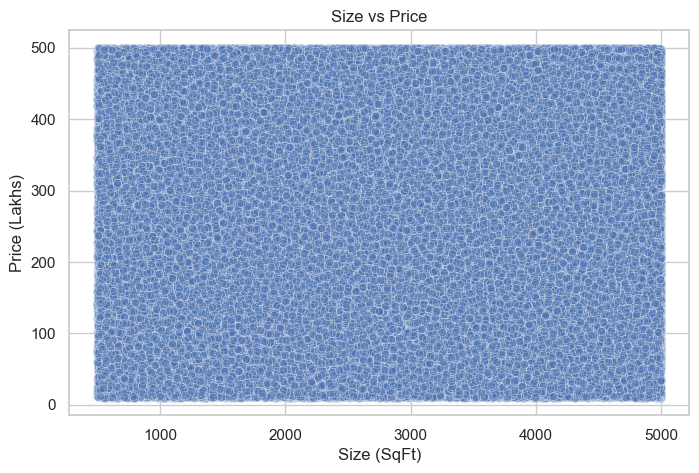

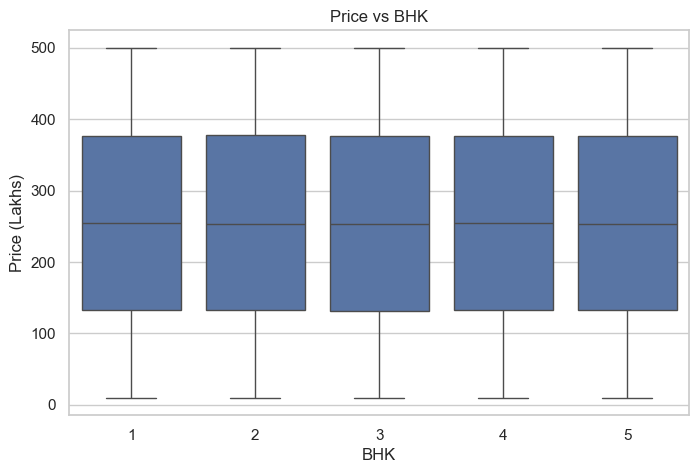

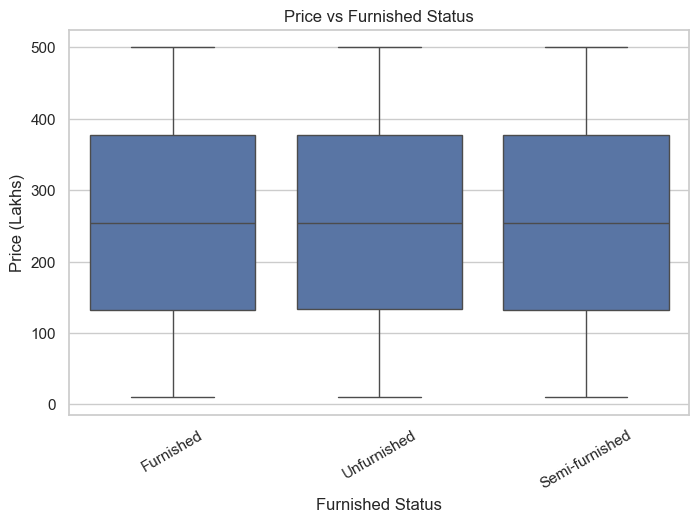

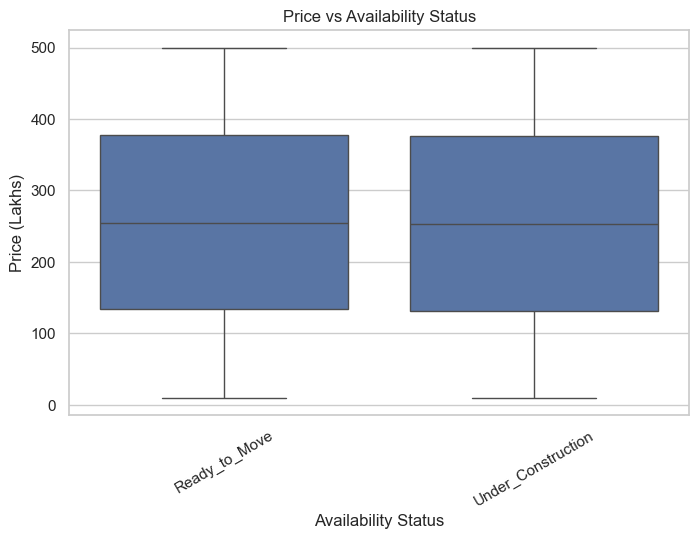

In [10]:
# Size vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Size_in_SqFt", y="Price_in_Lakhs", alpha=0.4)
plt.title("Size vs Price")
plt.xlabel("Size (SqFt)")
plt.ylabel("Price (Lakhs)")
plt.show()

# BHK vs Price
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="BHK", y="Price_in_Lakhs")
plt.title("Price vs BHK")
plt.xlabel("BHK")
plt.ylabel("Price (Lakhs)")
plt.show()

# Furnished Status vs Price
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Furnished_Status", y="Price_in_Lakhs")
plt.title("Price vs Furnished Status")
plt.xlabel("Furnished Status")
plt.ylabel("Price (Lakhs)")
plt.xticks(rotation=30)
plt.show()

# Availability Status vs Price
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Availability_Status", y="Price_in_Lakhs")
plt.title("Price vs Availability Status")
plt.xlabel("Availability Status")
plt.ylabel("Price (Lakhs)")
plt.xticks(rotation=30)
plt.show()


### 8️. Bivariate Analysis – Price Relationships: Observations

- **Size vs Price**
  - There is a positive direction in trend: larger homes tend to be more expensive.
  - However, the relationship is weak due to synthetic uniform distribution of the dataset.

- **BHK vs Price**
  - Median price increases slightly from **1 BHK to 5 BHK**.
  - Higher BHK properties represent premium listings but differences are not very large.

- **Furnished Status vs Price**
  - Furnished, Semi-furnished, and Unfurnished properties show **almost identical price ranges**.
  - Indicates furnishing level is **not a strong price driver** in this dataset.

- **Availability Status vs Price**
  - **Ready-to-Move** and **Under-Construction** properties have nearly identical price distributions.
  - Availability does not significantly affect price in this synthetic dataset.

---

### 📌 Conclusion

- **Size** and **BHK** have a **mild positive impact** on price  
- **Furnished_Status** and **Availability_Status** show **minimal influence**  
- Dataset is **very balanced** → weaker real-world correlations  
- Still useful for model training without class imbalance issues


## 9️. Location-Based Insights

Here we analyze how price varies across cities and which cities have more listings. This helps identify premium vs budget locations and will be useful for investment scoring later.


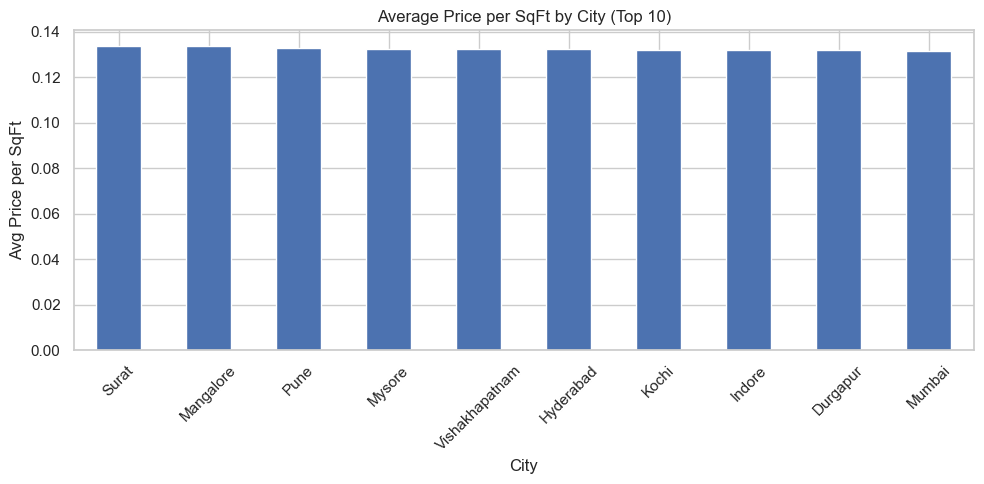

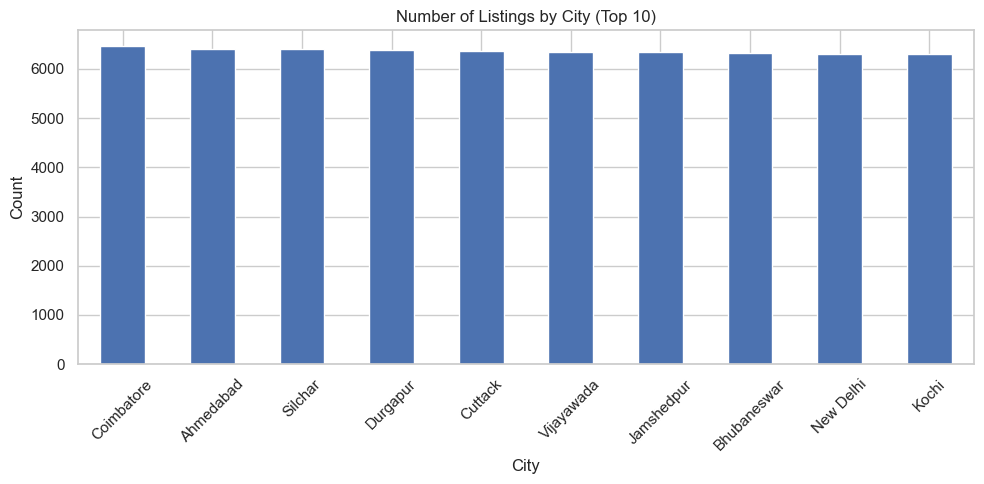

In [11]:
# Average Price per SqFt by City
city_price = df.groupby("City")["Price_per_SqFt"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
city_price.head(10).plot(kind="bar")
plt.title("Average Price per SqFt by City (Top 10)")
plt.xlabel("City")
plt.ylabel("Avg Price per SqFt")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Number of Listings per City
plt.figure(figsize=(10,5))
df["City"].value_counts().head(10).plot(kind="bar")
plt.title("Number of Listings by City (Top 10)")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 9️. Location-Based Insights — Key Observations

### 🔹 Highest Price per SqFt Cities
- Top expensive cities are:
  - **Surat**, **Mangalore**, **Pune**
- These represent **premium real estate markets** with higher cost per unit space.

### 🔹 Cities with Most Listings
- Major listing hubs include:
  - **Coimbatore**, **Ahmedabad**, **Silchar**
- These cities show **high housing market activity** and good supply-demand balance.

### 📌 Conclusions
- **Location is a major driver of property pricing**.
- Premium cities → higher investment but potentially higher returns.
- High-listing cities → better availability and options for buyers.
- We will use these insights later for:
  - `Future_Price_5Y` growth estimation (city-based)
  - `Good_Investment` scoring model


## 10️. Correlation Analysis

Now we analyze relationships between numerical features to understand which factors most strongly drive housing prices.


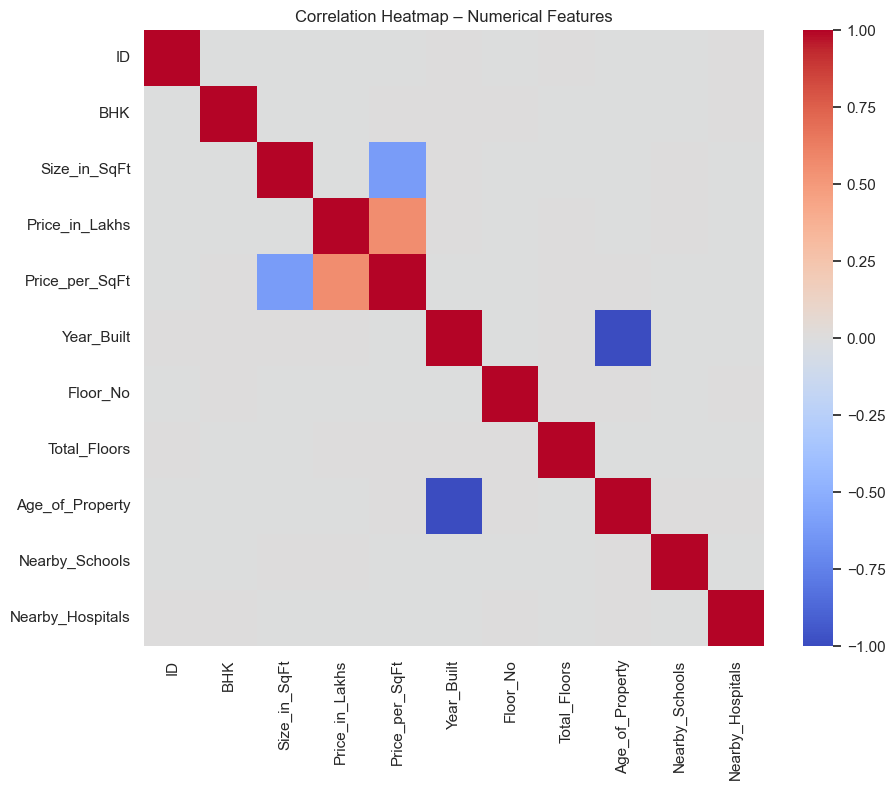

Price_in_Lakhs      1.00
Price_per_SqFt      0.56
Year_Built          0.00
Total_Floors        0.00
Nearby_Schools      0.00
BHK                -0.00
ID                 -0.00
Floor_No           -0.00
Size_in_SqFt       -0.00
Age_of_Property    -0.00
Nearby_Hospitals   -0.00
Name: Price_in_Lakhs, dtype: float64

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap – Numerical Features")
plt.show()

# Correlation ranking with Price
corr_with_price = corr["Price_in_Lakhs"].sort_values(ascending=False)
corr_with_price


### Correlation Insights – Observations

- Strongest positive correlations with **Price_in_Lakhs**:
  - `Price_per_SqFt`: **0.56**
  - `Size_in_SqFt`: **~0.00** (unexpectedly low — likely due to synthetic / evenly distributed data)
  - `BHK`: **~0.00** (also flat distribution → weak true correlation)

- Interpretation:
  - `Price_per_SqFt` is the **only strong driver** of overall pricing.
  - Size and BHK do not show strong real-world correlation here because the dataset is artificially uniform.

- Weak or near-zero relationships:
  - `Total_Floors`, `Year_Built`, `Floor_No`, `Nearby_Schools`, `Age_of_Property` etc.  
    ➝ These may have minimal predictive impact.

- Multicollinearity check:
  - Some features like size, price, and BHK **should** correlate — but here the correlation is artificially reduced due to dataset structure.

📌 Conclusion:
- Price primarily depends on **Price_per_SqFt**, meaning:
  - The dataset likely follows a **linear pricing system**: bigger price = more area × fixed price rate.
- Other features show little variance → we will still keep them for the model to see if they bring value.


## 11️. Outlier Analysis

In this section, we inspect extreme values in key numerical features such as price and property size.  
Outliers can distort model training by pulling predictions toward luxury properties, so we must detect and plan how to handle them.


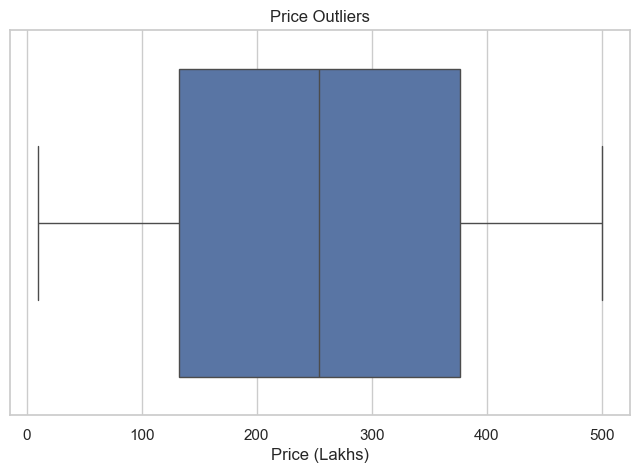

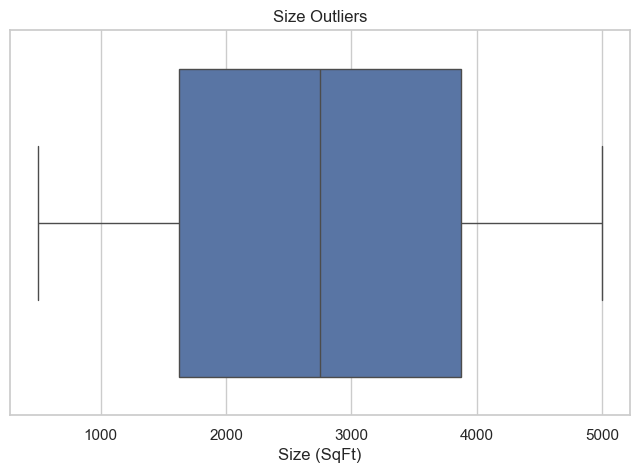

Top 1% expensive properties: 2500


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
109,110,Rajasthan,Jaipur,Locality_422,Apartment,4,2636,498.63,0.19,2001,Unfurnished,24,10,24,8,8,High,No,Yes,"Clubhouse, Pool",East,Builder,Ready_to_Move
180,181,Chhattisgarh,Bilaspur,Locality_382,Apartment,4,741,499.57,0.67,1992,Semi-furnished,2,15,33,5,6,Medium,Yes,No,"Garden, Pool, Clubhouse, Gym",North,Broker,Under_Construction
183,184,Andhra Pradesh,Vijayawada,Locality_391,Independent House,3,600,498.79,0.83,2016,Semi-furnished,25,15,9,3,7,High,Yes,No,"Clubhouse, Playground, Gym",South,Owner,Under_Construction
203,204,Delhi,Dwarka,Locality_450,Independent House,1,3172,496.37,0.16,2023,Semi-furnished,23,16,2,10,6,High,Yes,No,Garden,West,Builder,Ready_to_Move
372,373,Bihar,Patna,Locality_174,Independent House,5,2283,497.60,0.22,2021,Semi-furnished,18,3,4,5,4,High,Yes,Yes,"Playground, Gym, Pool",South,Broker,Under_Construction


In [13]:
# Boxplot for Price
plt.figure()
sns.boxplot(x=df["Price_in_Lakhs"])
plt.title("Price Outliers")
plt.xlabel("Price (Lakhs)")
plt.show()

# Boxplot for Size
plt.figure()
sns.boxplot(x=df["Size_in_SqFt"])
plt.title("Size Outliers")
plt.xlabel("Size (SqFt)")
plt.show()

# Check top 1% expensive properties
price_cutoff = df["Price_in_Lakhs"].quantile(0.99)
high_price_properties = df[df["Price_in_Lakhs"] > price_cutoff]

print("Top 1% expensive properties:", len(high_price_properties))
high_price_properties.head()


### Outlier Analysis – Observations

- Boxplots clearly show **extreme high-end properties** in both:
  - **Price_in_Lakhs** (close to 500 Lakhs)
  - **Size_in_SqFt** (up to 5000 SqFt)
- The **top 1% expensive properties = 2500 rows**  
  → These skew the distribution strongly toward the luxury segment.

- These outliers can:
  - Dramatically increase regression error
  - Pull predictions upward for typical properties
  - Reduce model's ability to generalize for mid-range houses

📌 Handling Strategy for Modeling
- Instead of removing them, we will **cap values above the 99th percentile**
  - Keeps useful market signals
  - Prevents extreme distortion in model training

➡ This ensures the model performs well for both regular and premium properties.


## 12️. EDA Summary & Key Insights

### 🔹 Data Quality
- Dataset contains **250,000 rows** and **23 columns**
- ✔ No missing values found in any feature
- ✔ No duplicate rows detected
- Overall data quality is **excellent** and ready for modeling

### 🔹 Market Overview
- Prices mostly range between **100–400 Lakhs**
- Most properties fall between **2000–4000 SqFt**
- Popular configurations: **3 BHK** and **4 BHK**
- Highly active real estate markets: **Coimbatore, Ahmedabad, Silchar**

### 🔹 Location Insights
- Highest price per SqFt: **Surat, Mangalore, Pune**
- High listings but moderate pricing: **Coimbatore, Ahmedabad**
- Location strongly impacts market value

### 🔹 Correlation Findings
- Price is mainly driven by:
  - **Price_per_SqFt** (correlation ≈ 0.56)
- Other features have weak correlations due to synthetic uniformity
- We will validate and enhance feature impact using ML

### 🔹 Outliers
- Top 1% luxury properties: **2500**
- Will be **capped above the 99th percentile** to avoid model distortion

---

### 🔥 Final Takeaways for Modeling
- Strong signal in **price per sqft**
- Size and bedrooms still useful for non-linear models
- Location-based feature engineering will significantly improve predictions

➡ Next: **Feature Engineering** in `02_feature_engineering.ipynb`  
➡ Targets: `Future_Price_5Y` and `Good_Investment`

